In [15]:
using CSV, DataFrames
using FileIO, Dates
using Graphs, MetaGraphs
using DataStructures
using PyCall
using Plots, PyPlot; gr()
# using HypothesisTests

include("./src/cubes.jl")
include("./src/network.jl")

@pyimport powerlaw as powlaw

In [2]:
region = "california"
mkpath("./results/$region")

df = CSV.read("./data/$(region).csv", DataFrame);

magnitude_threshold = 0.0
df = df[df.Magnitude .> magnitude_threshold,:];

In [3]:
# cube_sides = [5,10]
# degrees_alpha=[]
# degrees_xmin=[]

# for side in cube_sides
#     df, df_cubes = region_cube_split(df,side=side)
#     MG = create_network(df, df_cubes)
#     degrees=[]
#     for i in 1:nv(MG)
#         push!(degrees, get_prop(MG, i, :degree))
#     end

#     fit_degrees = powlaw.Fit(degrees);
#     push!(degrees_alpha, fit_degrees.alpha)
#     push!(degrees_xmin, fit_degrees.xmin)

# end

In [44]:
side = 3
degrees_alpha=[]
degrees_xmin=[]

df, df_cubes = region_cube_split(df,side=side)
MG = create_network(df, df_cubes)
degrees=[]
for i in 1:nv(MG)
    push!(degrees, get_prop(MG, i, :degree))
end

fit_degrees = powlaw.Fit(degrees);
alpha = round(fit_degrees.alpha, digits=4)
xmin = fit_degrees.xmin

Calculating best minimal value for power law fit


314.0

In [45]:
alpha

2.4465

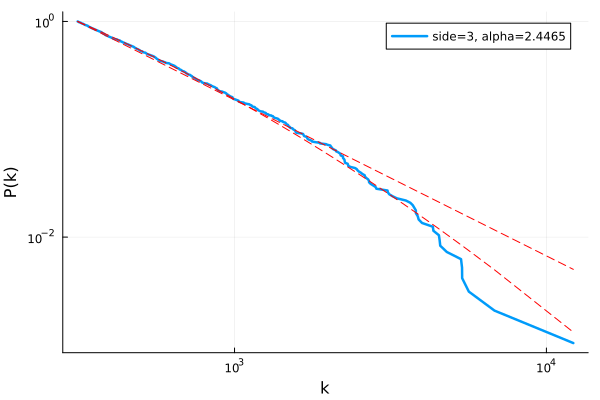

In [46]:
Plots.plot(xlabel = "k", ylabel = "P(k)")
x_ccdf, y_ccdf = fit_degrees.ccdf()
Plots.plot!(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side, alpha=$alpha", linewidth=2.5)

# Theoretical power_law
fit_degrees_power_law = fit_degrees.power_law.plot_ccdf()[:lines][1]
x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
Plots.plot!(x_powlaw, y_powlaw, xscale=:log10, yscale=:log10, label="", color=:red, linestyle=:dash) #label="power law, alpha=$(alpha)")

# Theoretical lognormal
fit_degrees_lognormal = fit_degrees.lognormal.plot_ccdf()[:lines][1]
x_lognormal, y_lognormal = fit_degrees_lognormal[:get_xdata](), fit_degrees_lognormal[:get_ydata]()
Plots.plot!(x_lognormal, y_lognormal, xscale=:log10, yscale=:log10, label="", color=:red, linestyle=:dash) #label="power law, alpha=$(alpha)")

In [47]:
fit_degrees.power_law.KS(data=degrees)

0.032755406244338814

In [48]:
# Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
fit_degrees.lognormal.KS(data=degrees)

0.018720574347945634

In [49]:
fit_degrees.distribution_compare("power_law","lognormal")

(-6.409326660432441, 0.023287618333048207)

In [50]:
fit_degrees.distribution_compare("power_law","power_law")

(0.0, 1.0)

In [ ]:
Plots.plot(xlabel = "k", ylabel = "P(k)")
for side in [3,5,8,10,15]
    df, df_cubes = region_cube_split(df,side=side)
    MG = create_network(df, df_cubes)
    degrees=[]
    # indegrees=[]
    # outdegrees=[]
    for i in 1:nv(MG)
        push!(degrees, get_prop(MG, i, :degree))
        # push!(indegrees, get_prop(MG, i, :indegree))
        # push!(outdegrees, get_prop(MG, i, :outdegree))
    end

    fit = powlaw.Fit(degrees);
    alpha = round(fit.alpha,digits=4)

    # CCDF of data truncated
    x_ccdf, y_ccdf = fit.ccdf()
    Plots.plot!(x_ccdf, y_ccdf, xscale=:log10, yscale=:log10, label="side=$side, alpha=$alpha", linewidth=2.5)
    
    # Theoretical power_law
    
    fit_degrees_power_law = fit.power_law.plot_ccdf()[:lines][1]
    x_powlaw, y_powlaw = fit_degrees_power_law[:get_xdata](), fit_degrees_power_law[:get_ydata]()
    Plots.plot!(x_powlaw, y_powlaw, xscale=:log10, yscale=:log10, label="", color=:red, linestyle=:dash) #label="power law, alpha=$(alpha)")
    
    # # Theoretical lognormal
    # mu = round(fit.lognormal.mu, digits=4)
    # fit_degrees_lognormal = fit.lognormal.plot_ccdf()[:lines][1]
    # x_lognormal, y_lognormal = fit_degrees_lognormal[:get_xdata](), fit_degrees_lognormal[:get_ydata]()
    # Plots.plot!(x_lognormal, y_lognormal, xscale=:log10, yscale=:log10, label="") #label="lognormal, mu=$(mu)")

end
plot!(size=(800,500), legend=:bottomleft)
current()
Plots.savefig("./results/$region/$(region)_mag_$(magnitude_threshold)_ccdfs_and_fits.png")
current()

In [28]:
fit_degrees.distribution_compare(’power_law’, ’exponential’)


ErrorException: syntax: invalid character "’" near column 34

In [21]:
powlaw.likelihoods(degrees)

UndefVarError: UndefVarError: likelihoods not defined

In [11]:
degrees_xmin

1-element Vector{Any}:
 10.0

In [23]:
powlaw.power_law.likelihoods(degrees)

UndefVarError: UndefVarError: power_law not defined